# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:04, 34.5MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile

Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 6590:
Image - Min Value: 13 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 3 Name: cat

Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 8712:
Image - Min Value: 3 Max Value: 246
Image - Shape: (32, 32, 3)
Label - Label Id: 7 Name: horse

Sta

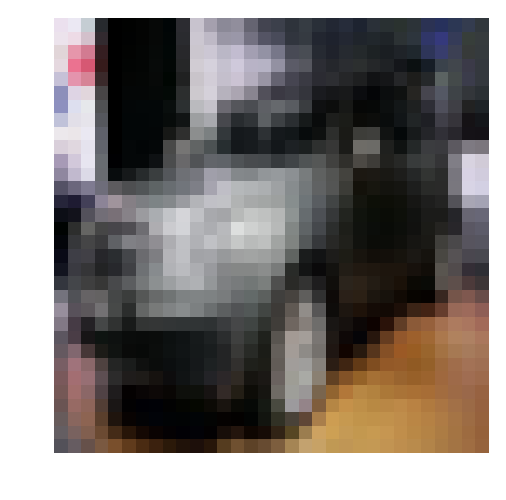

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np
import math
from random import random

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Explore the dataset
batch_id = 1
sample_id = 5
total_batches = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

for batch in range(1, total_batches + 1):
    random_sample = math.ceil(random() * 10000)
    helper.display_stats(cifar10_dataset_folder_path, batch, random_sample)
    

#### Observations: ####

I ran above code cell multiple times to get different results, and following are my observations:

1. All batches are of equal size - 10000 samples.
2. There are 10 samples in each batch with almost even distribution.
3. The order of these labels is random, by looking at the first 20 labels in sequence.
4. Each image is of dimension 32x32x3 with min value 0 and max value of 255.

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [67]:
from sklearn import preprocessing

# Define the input dimensions.

ip_w = 32
ip_h = 32
ip_d = 3

def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x = np.reshape(x, (-1, (ip_w * ip_h * ip_d)))
    normalized = preprocessing.normalize(x)
    return np.reshape(normalized, (-1, ip_w, ip_h, ip_d))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [68]:
from sklearn.preprocessing import LabelBinarizer

valid_labels = np.array(range(10))
hot_encoder = LabelBinarizer().fit(valid_labels)

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    hot_encoded = hot_encoder.transform(x)
    return hot_encoded


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [69]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    x = tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]), name="x")
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    y = tf.placeholder(tf.float32, shape=(None, n_classes), name = "y")
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [61]:
import math

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Unpack conv layer parameters.
    batch, ip_w, ip_h, ip_d = x_tensor.shape
    f_w, f_h = conv_ksize
    stride_w, stride_h = conv_strides

    # Create weight dimensions.
    weights_ipd = ip_d.value
    weights_opd = conv_num_outputs

    # Unpack Pool K Size and Pool Stride Size.
    pool_kw, pool_kh = pool_ksize
    pool_stride_w, pool_stride_h = pool_strides 

    # Define weight and bias as tf variables, so they could be learned.
    weight = tf.Variable(tf.truncated_normal([f_w, f_h, weights_ipd, weights_opd], stddev=0.1))
    bias = tf.Variable(tf.zeros(conv_num_outputs))

    # Look at the dimensions of weight.
    print (weight)
    print (bias)
    
    # Conv layer operations.
    conv_layer = tf.nn.conv2d(x_tensor, weight, [1, stride_w, stride_h, 1], "SAME")
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    # Max pooling operation.
    conv_layer = tf.nn.max_pool(conv_layer, [1, pool_kw, pool_kh, 1], [1, pool_stride_w, pool_stride_h, 1], "SAME")

    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

<tf.Variable 'Variable_24:0' shape=(2, 2, 5, 10) dtype=float32_ref>
<tf.Variable 'Variable_25:0' shape=(10,) dtype=float32_ref>
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    batch_size, ip_w, ip_h, ip_d = x_tensor.shape
    return tf.reshape(x_tensor, shape=(-1, ip_w.value * ip_h.value * ip_d.value))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [6]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    features = x_tensor.shape[1].value
    hidden_outputs = num_outputs
    
    # Define the weights and bias for fully connected hidden layer.
    weights_hidden = tf.Variable(tf.truncated_normal([features, hidden_outputs], stddev=0.1))
    bias_hidden = tf.Variable(tf.zeros(hidden_outputs))

    print (weights_hidden)
    print (bias_hidden)
    
    # Hidden layer computation and activation.
    hidden_output = tf.add(tf.matmul(x_tensor, weights_hidden), bias_hidden)
    hidden_output = tf.nn.relu(hidden_output)
    return hidden_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

<tf.Variable 'Variable_4:0' shape=(128, 40) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(40,) dtype=float32_ref>
Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [7]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    features = x_tensor.shape[1].value

    # Define weights and biases for the output layer.
    weights_output = tf.Variable(tf.truncated_normal([features, num_outputs], stddev=0.1))
    bias_output = tf.Variable(tf.zeros(num_outputs))
    
    print (weights_output)
    print (bias_output)
    
    # Output layer computation.
    output = tf.add(tf.matmul(x_tensor, weights_output), bias_output)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

<tf.Variable 'Variable_6:0' shape=(128, 40) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(40,) dtype=float32_ref>
Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [114]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    x_tensor = x
    
    # Convolution layer 1.
    conv_num_outputs = 64
    conv_ksize = [3, 3]
    conv_strides = [1, 1]
    pool_ksize = [3, 3]
    pool_strides = [2, 2]
    conv_output = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Convolution layer 2.
    conv_num_outputs_second = 64
    conv_ksize = [3, 3]
    conv_strides = [1, 1]
    pool_ksize = [3, 3]
    pool_strides = [2, 2]
    conv_output = conv2d_maxpool(conv_output,conv_num_outputs_second, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # Convolution layer 3.
    conv_num_outputs_second = 128
    conv_ksize = [3, 3]
    conv_strides = [1, 1]
    pool_ksize = [3, 3]
    pool_strides = [2, 2]
    conv_output = conv2d_maxpool(conv_output,conv_num_outputs_second, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # Convolution layer 4.
#     conv_num_outputs_second = 512
#     conv_ksize = [5, 5]
#     conv_strides = [2, 2]
#     pool_ksize = [3, 3]
#     pool_strides = [2, 2]
#     conv_output = conv2d_maxpool(conv_output,conv_num_outputs_second, conv_ksize, conv_strides, pool_ksize, pool_strides)

    tf.nn.dropout(conv_output, keep_prob=keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    flattened = flatten(conv_output)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    
    # Fully connected layer 1.
    fc_hidden_layer_depth = 512
    fully_connected_output = fully_conn(flattened, num_outputs=fc_hidden_layer_depth)
    tf.nn.dropout(fully_connected_output, keep_prob=keep_prob)

    # Fully connected layer 2.
    fc_hidden_layer_depth = 256
    fully_connected_output = fully_conn(fully_connected_output, num_outputs=fc_hidden_layer_depth)
    tf.nn.dropout(fully_connected_output, keep_prob=keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    final_output = output(fully_connected_output, num_outputs=10)
    
    
    # TODO: return output
    return final_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001, epsilon=0.0001).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

<tf.Variable 'Variable:0' shape=(3, 3, 3, 64) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Variable_2:0' shape=(3, 3, 64, 64) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(3, 3, 64, 128) dtype=float32_ref>
<tf.Variable 'Variable_5:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'Variable_6:0' shape=(2048, 512) dtype=float32_ref>
<tf.Variable 'Variable_7:0' shape=(512,) dtype=float32_ref>
<tf.Variable 'Variable_8:0' shape=(512, 256) dtype=float32_ref>
<tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'Variable_10:0' shape=(256, 10) dtype=float32_ref>
<tf.Variable 'Variable_11:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'Variable_12:0' shape=(3, 3, 3, 64) dtype=float32_ref>
<tf.Variable 'Variable_13:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'Variable_14:0' shape=(3, 3, 64, 64) dtype=float32_ref>
<tf.Variable 'Variable_15:0' shape=(64,) dtype=flo

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [115]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [116]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    cost_result = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    
    print("Loss: {}, Validation Accuracy: {}".format(cost_result, validation_accuracy))
    

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [117]:
# TODO: Tune Parameters
epochs = 100
batch_size = 512
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [112]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
save_model_path = './image_classification'

print('Training...')
print ('Epochs: {}'.format(epochs))

config = tf.ConfigProto(log_device_placement=True)

with tf.Session(config=config) as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    print("Training the model with bath size: {}, epochs: {}, keep probability: {}".format(batch_size, epochs, keep_probability))
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
        if epoch % 100 == 0:
            print ("Saving the trained model.")
            saver = tf.train.Saver()
            save_path = saver.save(sess, save_model_path)

Checking the Training on a Single Batch...
Training...
Epochs: 100
Training the model with bath size: 256, epochs: 100, keep probability: 0.5
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.0523781776428223, Validation Accuracy: 0.2961999773979187
Saving the trained model.
Epoch  2, CIFAR-10 Batch 1:  Loss: 1.7155215740203857, Validation Accuracy: 0.38339996337890625
Epoch  3, CIFAR-10 Batch 1:  Loss: 1.5732582807540894, Validation Accuracy: 0.41359996795654297
Epoch  4, CIFAR-10 Batch 1:  Loss: 1.4034559726715088, Validation Accuracy: 0.4285999834537506
Epoch  5, CIFAR-10 Batch 1:  Loss: 1.2250471115112305, Validation Accuracy: 0.4577999711036682
Epoch  6, CIFAR-10 Batch 1:  Loss: 1.1721957921981812, Validation Accuracy: 0.4408000111579895
Epoch  7, CIFAR-10 Batch 1:  Loss: 1.0285711288452148, Validation Accuracy: 0.4551999866962433
Epoch  8, CIFAR-10 Batch 1:  Loss: 0.8165987730026245, Validation Accuracy: 0.5017999410629272
Epoch  9, CIFAR-10 Batch 1:  Loss: 0.7394711971282959, Validation Accu

Epoch 84, CIFAR-10 Batch 1:  Loss: 2.3156155748438323e-06, Validation Accuracy: 0.6297998428344727
Epoch 85, CIFAR-10 Batch 1:  Loss: 2.2351509869622532e-06, Validation Accuracy: 0.6291998624801636
Epoch 86, CIFAR-10 Batch 1:  Loss: 2.1636269593727775e-06, Validation Accuracy: 0.6287999153137207
Epoch 87, CIFAR-10 Batch 1:  Loss: 2.086142558255233e-06, Validation Accuracy: 0.6287999153137207
Epoch 88, CIFAR-10 Batch 1:  Loss: 2.023558863584185e-06, Validation Accuracy: 0.6287999153137207
Epoch 89, CIFAR-10 Batch 1:  Loss: 1.9520348359947093e-06, Validation Accuracy: 0.6289999485015869
Epoch 90, CIFAR-10 Batch 1:  Loss: 1.8954115148517303e-06, Validation Accuracy: 0.6287999153137207
Epoch 91, CIFAR-10 Batch 1:  Loss: 1.8268669919052627e-06, Validation Accuracy: 0.6289999485015869
Epoch 92, CIFAR-10 Batch 1:  Loss: 1.7702436707622837e-06, Validation Accuracy: 0.6289998292922974
Epoch 93, CIFAR-10 Batch 1:  Loss: 1.7195804957736982e-06, Validation Accuracy: 0.6291998624801636
Epoch 94, CI

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [118]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
print ('Epochs: {}'.format(epochs))

config = tf.ConfigProto(log_device_placement=True)

with tf.Session(config=config) as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
        # Save at every 10th epoch.
        if epoch % 100 == 0:
            print ("Saving the trained model.")
            saver = tf.train.Saver()
            save_path = saver.save(sess, save_model_path)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epochs: 100
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.251865863800049, Validation Accuracy: 0.15859998762607574
Epoch  1, CIFAR-10 Batch 2:  Loss: 2.0170483589172363, Validation Accuracy: 0.24739998579025269
Epoch  1, CIFAR-10 Batch 3:  Loss: 1.913637399673462, Validation Accuracy: 0.2767999768257141
Epoch  1, CIFAR-10 Batch 4:  Loss: 1.7584495544433594, Validation Accuracy: 0.3384000062942505
Epoch  1, CIFAR-10 Batch 5:  Loss: 1.7396659851074219, Validation Accuracy: 0.39079999923706055
Saving the trained model.
Epoch  2, CIFAR-10 Batch 1:  Loss: 1.692024827003479, Validation Accuracy: 0.4147999882698059
Epoch  2, CIFAR-10 Batch 2:  Loss: 1.5691601037979126, Validation Accuracy: 0.4283999502658844
Epoch  2, CIFAR-10 Batch 3:  Loss: 1.4389426708221436, Validation Accuracy: 0.4309999644756317
Epoch  2, CIFAR-10 Batch 4:  Loss: 1.462384819984436, Validation Accuracy: 0.4227999448776245
Epoch  2, CIFAR-10 Batch 5:  Loss: 1.4932230710983276, Validation Accuracy: 0.4567999541759491
E

Epoch 18, CIFAR-10 Batch 2:  Loss: 0.5126312375068665, Validation Accuracy: 0.6783998608589172
Epoch 18, CIFAR-10 Batch 3:  Loss: 0.3999987244606018, Validation Accuracy: 0.6951999068260193
Epoch 18, CIFAR-10 Batch 4:  Loss: 0.4099477529525757, Validation Accuracy: 0.6869999170303345
Epoch 18, CIFAR-10 Batch 5:  Loss: 0.37734875082969666, Validation Accuracy: 0.6807998418807983
Epoch 19, CIFAR-10 Batch 1:  Loss: 0.41099876165390015, Validation Accuracy: 0.6975998878479004
Epoch 19, CIFAR-10 Batch 2:  Loss: 0.46542179584503174, Validation Accuracy: 0.6875998973846436
Epoch 19, CIFAR-10 Batch 3:  Loss: 0.3812134265899658, Validation Accuracy: 0.696199893951416
Epoch 19, CIFAR-10 Batch 4:  Loss: 0.3711051344871521, Validation Accuracy: 0.6827999353408813
Epoch 19, CIFAR-10 Batch 5:  Loss: 0.33999985456466675, Validation Accuracy: 0.6831998825073242
Epoch 20, CIFAR-10 Batch 1:  Loss: 0.38913071155548096, Validation Accuracy: 0.6963999271392822
Epoch 20, CIFAR-10 Batch 2:  Loss: 0.434648931

Epoch 35, CIFAR-10 Batch 3:  Loss: 0.14100299775600433, Validation Accuracy: 0.6683998107910156
Epoch 35, CIFAR-10 Batch 4:  Loss: 0.10762877017259598, Validation Accuracy: 0.700799822807312
Epoch 35, CIFAR-10 Batch 5:  Loss: 0.1084689348936081, Validation Accuracy: 0.6907998323440552
Epoch 36, CIFAR-10 Batch 1:  Loss: 0.18320070207118988, Validation Accuracy: 0.6705999374389648
Epoch 36, CIFAR-10 Batch 2:  Loss: 0.10748781263828278, Validation Accuracy: 0.6945998668670654
Epoch 36, CIFAR-10 Batch 3:  Loss: 0.12407812476158142, Validation Accuracy: 0.6685998439788818
Epoch 36, CIFAR-10 Batch 4:  Loss: 0.12461549043655396, Validation Accuracy: 0.6937998533248901
Epoch 36, CIFAR-10 Batch 5:  Loss: 0.12069806456565857, Validation Accuracy: 0.7061998248100281
Epoch 37, CIFAR-10 Batch 1:  Loss: 0.12191128730773926, Validation Accuracy: 0.681399941444397
Epoch 37, CIFAR-10 Batch 2:  Loss: 0.1464022696018219, Validation Accuracy: 0.6741998791694641
Epoch 37, CIFAR-10 Batch 3:  Loss: 0.1229851

Epoch 52, CIFAR-10 Batch 4:  Loss: 0.029570311307907104, Validation Accuracy: 0.6909999251365662
Epoch 52, CIFAR-10 Batch 5:  Loss: 0.01784186251461506, Validation Accuracy: 0.7051998972892761
Epoch 53, CIFAR-10 Batch 1:  Loss: 0.03950796648859978, Validation Accuracy: 0.7045999765396118
Epoch 53, CIFAR-10 Batch 2:  Loss: 0.029479967430233955, Validation Accuracy: 0.7029998302459717
Epoch 53, CIFAR-10 Batch 3:  Loss: 0.027531925588846207, Validation Accuracy: 0.7143998146057129
Epoch 53, CIFAR-10 Batch 4:  Loss: 0.019179079681634903, Validation Accuracy: 0.6989997625350952
Epoch 53, CIFAR-10 Batch 5:  Loss: 0.02597217820584774, Validation Accuracy: 0.6967998743057251
Epoch 54, CIFAR-10 Batch 1:  Loss: 0.028301723301410675, Validation Accuracy: 0.7017998099327087
Epoch 54, CIFAR-10 Batch 2:  Loss: 0.017622707411646843, Validation Accuracy: 0.7167998552322388
Epoch 54, CIFAR-10 Batch 3:  Loss: 0.013739470392465591, Validation Accuracy: 0.7079998850822449
Epoch 54, CIFAR-10 Batch 4:  Loss

Epoch 69, CIFAR-10 Batch 4:  Loss: 0.007266721222549677, Validation Accuracy: 0.6857998967170715
Epoch 69, CIFAR-10 Batch 5:  Loss: 0.004973575472831726, Validation Accuracy: 0.7113997936248779
Epoch 70, CIFAR-10 Batch 1:  Loss: 0.005968989804387093, Validation Accuracy: 0.7109998464584351
Epoch 70, CIFAR-10 Batch 2:  Loss: 0.0048119788989424706, Validation Accuracy: 0.7035998106002808
Epoch 70, CIFAR-10 Batch 3:  Loss: 0.0026281762402504683, Validation Accuracy: 0.7083998918533325
Epoch 70, CIFAR-10 Batch 4:  Loss: 0.003790919901803136, Validation Accuracy: 0.7069997787475586
Epoch 70, CIFAR-10 Batch 5:  Loss: 0.005380901973694563, Validation Accuracy: 0.7041999101638794
Epoch 71, CIFAR-10 Batch 1:  Loss: 0.0038758970331400633, Validation Accuracy: 0.7115998864173889
Epoch 71, CIFAR-10 Batch 2:  Loss: 0.0051245964132249355, Validation Accuracy: 0.7127998471260071
Epoch 71, CIFAR-10 Batch 3:  Loss: 0.0044114114716649055, Validation Accuracy: 0.7001998424530029
Epoch 71, CIFAR-10 Batch 

Epoch 86, CIFAR-10 Batch 4:  Loss: 0.001525779371149838, Validation Accuracy: 0.7163999080657959
Epoch 86, CIFAR-10 Batch 5:  Loss: 0.0032939796801656485, Validation Accuracy: 0.7109999060630798
Epoch 87, CIFAR-10 Batch 1:  Loss: 0.00250025256536901, Validation Accuracy: 0.7135998606681824
Epoch 87, CIFAR-10 Batch 2:  Loss: 0.0014711639378219843, Validation Accuracy: 0.72819983959198
Epoch 87, CIFAR-10 Batch 3:  Loss: 0.00386529671959579, Validation Accuracy: 0.7059997916221619
Epoch 87, CIFAR-10 Batch 4:  Loss: 0.00151053664740175, Validation Accuracy: 0.7183998227119446
Epoch 87, CIFAR-10 Batch 5:  Loss: 0.0012146501103416085, Validation Accuracy: 0.7159997820854187
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.0041471510194242, Validation Accuracy: 0.7139998078346252
Epoch 88, CIFAR-10 Batch 2:  Loss: 0.014394080266356468, Validation Accuracy: 0.7161997556686401
Epoch 88, CIFAR-10 Batch 3:  Loss: 0.003125718329101801, Validation Accuracy: 0.7075998783111572
Epoch 88, CIFAR-10 Batch 4:  Loss:

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Begin Testing...
INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7193471337579618



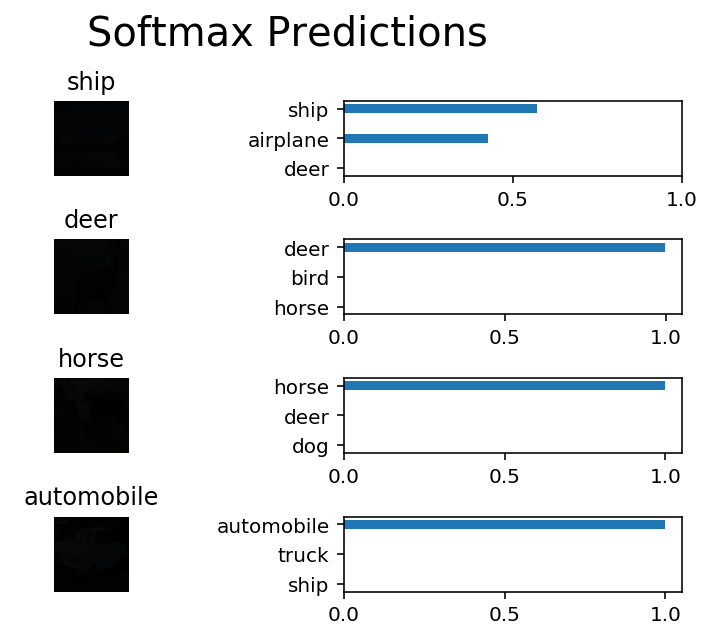

In [119]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

batch_size = 64
save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    print("Begin Testing...")
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.